# 📓 Lab 1 - Intro to Probabilistic Programming (Part 1 - Bayes)

# ❗❗❗ Very important administrative detail before we get to know each other

The lab changes its content once every **TWO WEEKS**.

*   week 1 & week 2 - lab1
*   week 3 & week 4 - lab2
*   ...


# Bayes' Theorem

Let $A, B$ events with $P(B) \ne 0$. Then:

$$
P(A|B) = \frac{P(B|A) P(A)}{P(B)}
$$

This theorem stands for any events $A, B$. Now, let's call ourselves scientists 🥼 in the middle of an experiment. We start by believing in a hypothesis $H$. Then, we see the evidence, $E$, resulting from an experiment run.


---


*What is the confidence in the hypothesis now that we have seen new data?*

Given Bayes' theorem, we can **update** the belief:

$$
P(H|E) = \frac{P(E|H) P(H)}{P(E)}
$$



*   The **PRIOR** $P(H)$ is the confidence in $H$ before evidence $E$ (it does not depend on $E$)
*   The **EVIDENCE** $P(E)$ does not depend on $H$ and is the same for any hypothesis $H$ we consider.
*   The **LIKELIHOOD** $P(E|H)$ is a compatibility measure between evidence and hypothesis. *(What is the probability to see the evidence $E$ if we believe in $H$?)*
*   The **POSTERIOR** $P(H|E)$ is our new belief in $H$. Now that we see data, we can update our belief about a hypothesis.

## Bayes' Theorem in practice

***Problem Statement:***

I own 2 coins: a fair coin $C_1$ (equivalent to $P(X=Heads | C=C_1) = 0.5$) and a strongly biased one $C_2$ with $P(X=Heads | C=C_2) = 0.9$. I put them in a bag, choose one *without looking* (**completely random**), toss it, and find it lands Tails. Which coin is more probable to have been picked and why?



---

***Intuition and Bayesian Solution***

It is an immediate intuition to say that $C_1$ was chosen, given the low rate of $C_2$ to come up Tails.

Which one was picked from the bag? I don't know yet, but I know that I choose one *without looking* (**completely random**). This means I give $PRIOR$ chances equal for both coins: $P(C=C_1) = P(C=C_2) = 0.5$.

Let $H$ and $T$ be the events of seeing Heads and Tails. With the new **EVIDENCE**
$P(X=T) = P(X=T|C=C_1)P(C=C_1) + P(X=T|C=C_2)P(C=C_2) = 0.5\times0.5 + 0.5\times0.1 = 0.3$,

the belief is updated with:

$P(C=C_i|X=T)=\frac{P(X=T|C=C_i)P(C=C_i)}{P(X=T|C=C_1)P(C=C_1) + P(X=T|C=C_2)P(C=C_2)}$

Then,

$P(C=C_1|X=T)=\frac{0.5\times0.5}{0.3}=\frac{5}{6}$

$P(C=C_2|X=T)=\frac{0.1\times0.5}{0.3}=\frac{1}{6}$

are the ***POSTERIOR*** beliefs in the coins.



### What if I favour one of the coins? What element of Bayes does this change?

A coin-building factory outputs coins $c_1, c_2, ...$ with different biases $p_1, p_2, ...$. Once the owner finds that $c_1$ is not fair, he starts halving the amount of the heavier materials in the coin-making process, each coin being lighter than the one before. I buy the first 10 coins, pull one from the ***top of the bag***, toss it, and it comes up Tails. Which coin did I probably pick?

### What if we see more data? New throws after the first Tails



```
1) T, H, H, H, H, T, H, H, H, H, H
2) T, H, H, T, H, T, H, T, T, H, T
```



What is your intuition for sequences of throws 1 and 2? Which one of the two coins from the exercise above generated them?


---

By applying Bayes on the sequences of throws, the likelihood looks like:

$P(X|(T, H, H, H, H, T, H, H, H, H, H))$

If $p$ is the probability of the coin and data *d* = (T, H, H, H, H, T, H, H, H, H, H), then the likelihood is viewed as a *function* of $p$, $\mathcal{L}(p|d)$. One proper likelihood distribution for this example is the **binomial** distribution which models the number of successes in a given number of binary experiments.

## Machine Learning - Classical vs. Bayesian

If classical ML practitioners are interested in prediction, the bayesians compute the probabilities and measure the uncertainty.

Notice the difference - *Predict which coin I picked from the bag* vs. *Compute the posterior for both coins*

# Bayesian Inference

For complex, statistical models of a problem, we model the priors and likelihoods with known distributions. Let's say a data sample $x$ comes from a distribution $p(x|\theta)$. $\theta$ is called the *parameter* of the distribution (it can also be a vector of values). Since the value of $\theta$ is unknown, let's set it also with a distribution $p(\theta|\alpha)$ ($\alpha$ is called *hyperparameter*). If $\mathbf{X}$ is the data vector $x_1, x_2, ...x_n$ of observed data samples, then:

$p(\theta| \mathbf{X}, \alpha) = ...=\frac{p(\mathbf{X}|\theta, \alpha)p(\theta|\alpha)}{p(\mathbf{X}|\alpha)}$

This is the formal definition of, again: The posterior probability distribution of $\theta$ after seeing new data $\mathbf{X}$ is (likelihood×prior / evidence)

# Probabilistic Programming

Probabilistic Programming (PP) is a programming paradigm that automates bayesian inference. We will come back to *how* they do it in a few weeks.

A *probabilistic* program models a *probabilistic story* of the world. We declare the variables (*probability distributions*) and run the program (an *inference algorithm*) to obtain the *posterior distribution*.

Here is a schematic of programming paradigms, as you can see PP is not depicted in this image. It would need a branch of its own given its probabilistic nature.

It's ok, you don't need to know them by heart 💀💀💀💀💀💀
<img src="https://www.cse.iitm.ac.in/~jayalal/images/paradigms.png" height="700" width="700">

Now we have distributions for prior and likelihood. How do they look like? We can use python libraries like NumPy and SciPy



## Code for distributions and exercises



*   The discrete uniform distribution
    - An experiment has **n** possible outcomes, each of them has equal probability of **1/n**
    - For example, a dice throw has 6 possible outcomes from 1 to 6, each with a probability of 1/6 (if the dice is fair).
*   The continuous uniform distribution
    - An experiment has an arbitrary outcome from a range of values
    - For example, the moment you receive a call when you expect one in the interval [9 a.m. - 11 a.m.].


---



Let's draw uniform samples from [0,1) and plot them in a histogram *(why histogram and not a simple plot?)*.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

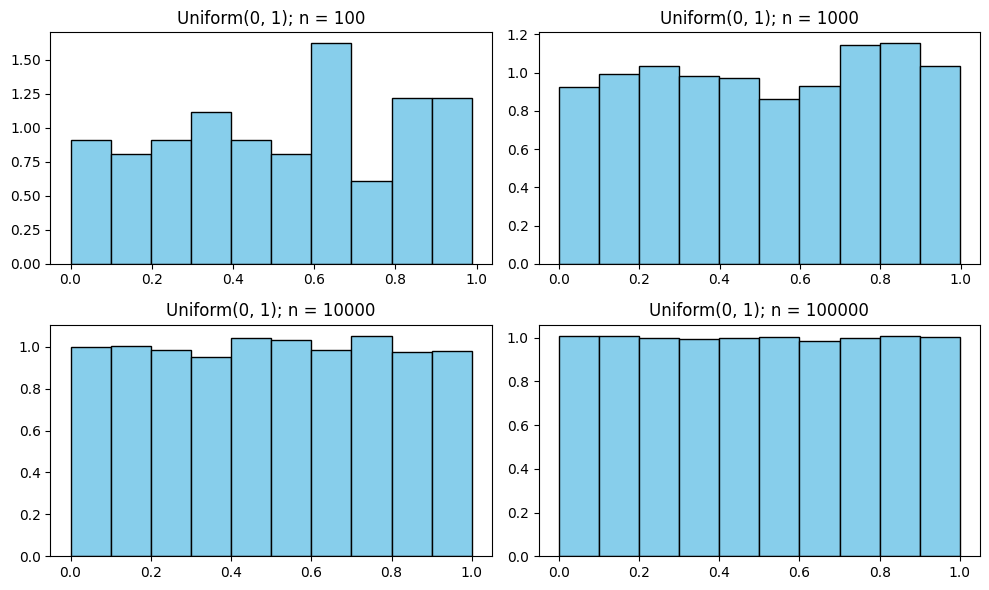

In [8]:
sample_sizes = [100, 1000, 10000, 100000]

fig, axes = plt.subplots(2, 2, figsize=(10, 6))
axes = axes.flatten()

for i, n in enumerate(sample_sizes):
    unif = np.random.uniform(0, 1, n)
    axes[i].hist(unif, bins=10, density=True, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Uniform(0, 1); n = {n}')

plt.tight_layout()
plt.show()

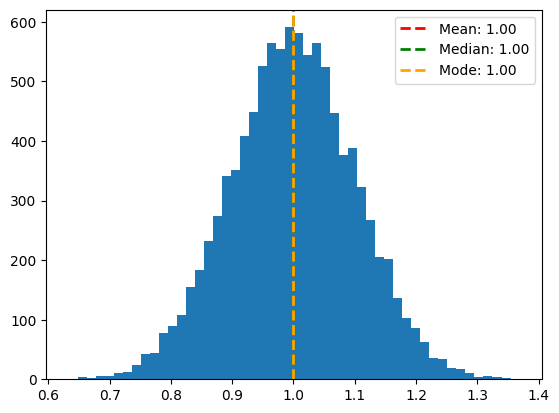

Mean: 0.9995197008494724
Median: 0.999953728896642
Mode: 1.0


In [5]:
# Open # https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

import numpy as np
import matplotlib.pyplot as plt

# 1: Draw 10^4 samples from a Normal distribution with mean 1 and standard deviation 0.1
samples = np.random.normal(1, 0.1, 10_000)

# 2: Plot the values in a histogram in 50 bins.
plt.hist(samples, bins=50)

# 3: What is the difference between mean, median, and mode? Find them using NumPy
mean = np.mean(samples)
median = np.median(samples)
values, counts = np.unique(np.round(samples, 2), return_counts=True)
mode = values[np.argmax(counts)]

plt.axvline(mean, color='red', linestyle='--', linewidth=2, label=f"Mean: {mean:.2f}")
plt.axvline(median, color='green', linestyle='--', linewidth=2, label=f"Median: {median:.2f}")
plt.axvline(mode, color='orange', linestyle='--', linewidth=2, label=f"Mode: {mode:.2f}")

plt.legend()
plt.show()

print(f"Mean: {mean}\nMedian: {median}\nMode: {mode}")

# mean -> sum divided by count
# mode -> middle value when ordered, p50 
# mode -> value that appears most frequently

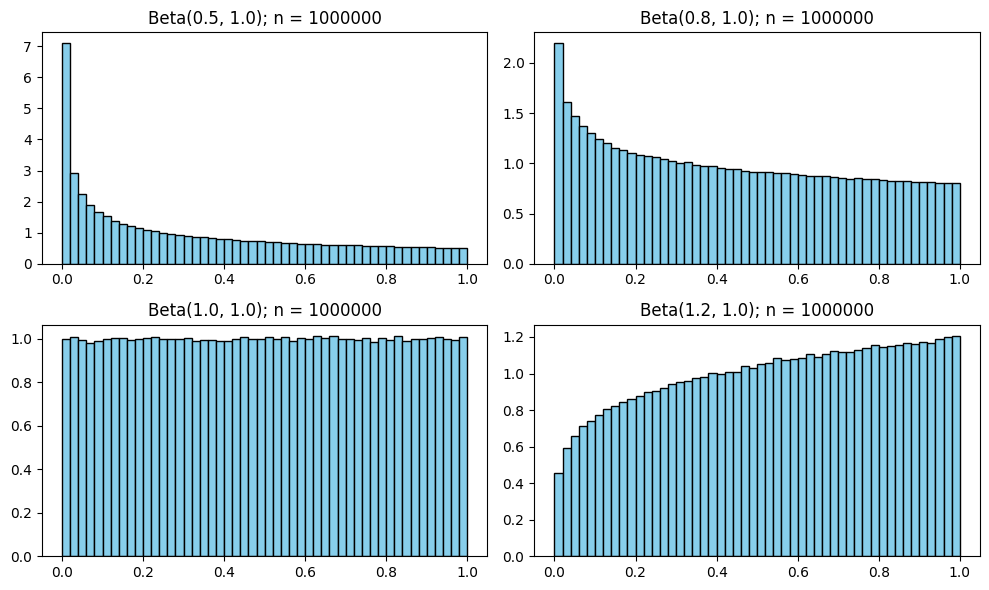

In [ ]:
# Open https://en.wikipedia.org/wiki/Beta_distribution
# The Beta distribution has two parameters.

# 4: What is the support of this distribution? Where can it be used then?
# [0, 1]
# use case: predict probabilities for events with know success/failure outcomes.

# 5: Use the code from the first example to generate 2x2 plots of drawing
# 10^6 samples from Beta with beta=1.0 and alpha in [0.5, 0.8, 1.0, 1.2]. Use
# 50 bins in the histogram.
samples = 1_000_000
beta = 1.0
alphas = [0.5, 0.8, 1.0, 1.2]
bins = 50

fig, axes = plt.subplots(2, 2, figsize=(10, 6))
axes = axes.flatten()

for i, alpha in enumerate(alphas):
    unif = np.random.beta(alpha, beta, size=samples)
    axes[i].hist(unif, bins=bins, density=True, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Beta({alpha}, {beta}); n = {samples}')

plt.tight_layout()
plt.show()

# Anything interesting?
# it's shape skews from left to right